<a href="https://colab.research.google.com/github/adityapatil4141/Deep-learning/blob/main/Regularization_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.datasets import make_moons
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions

In [23]:
x,y = make_moons(100,noise=0.25,random_state=2)

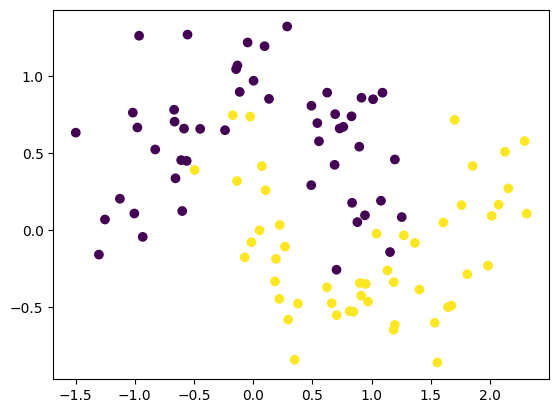

In [24]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [25]:
model1 = Sequential()

model1.add(Dense(128, activation='relu',input_dim=2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [26]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)

In [28]:
history = model1.fit(x,y,epochs=2000,validation_split=0.20,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


(-1.5, 2.0)

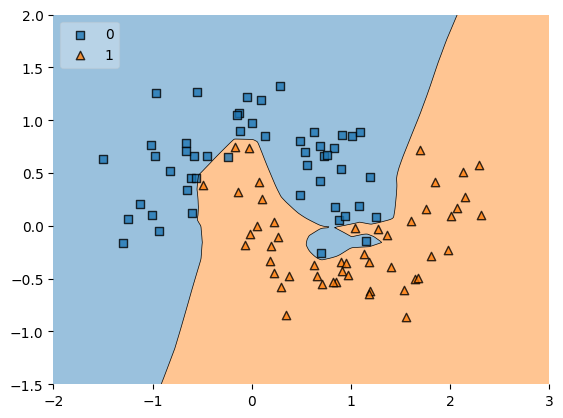

In [29]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)

In [30]:
# Overfitting happening

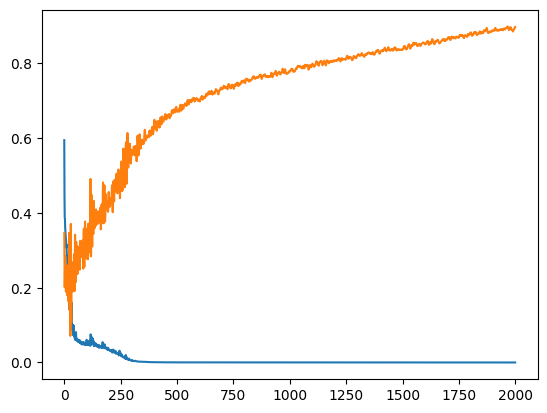

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Regularization:

In [32]:
model2 = Sequential()

model2.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=tensorflow.keras.regularizers.l1(0.03)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.03)))
model2.add(Dense(1,activation='sigmoid'))

In [33]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
history = model2.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


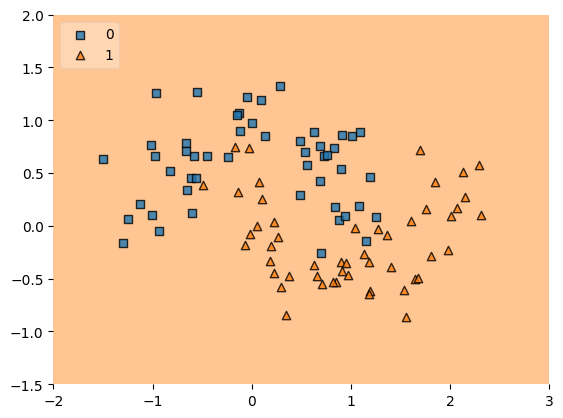

In [35]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

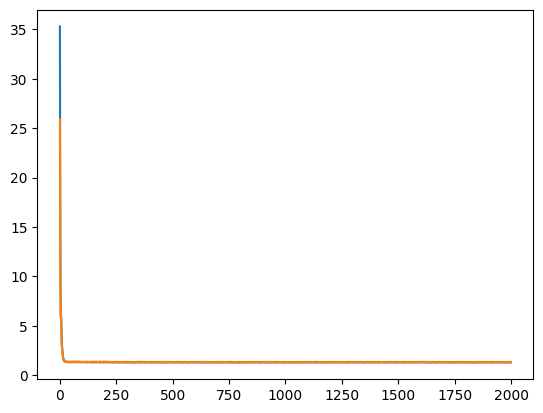

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [37]:
model1_weight1_layer1 = model1.get_weights()[0].reshape(256)
model2_weight1_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

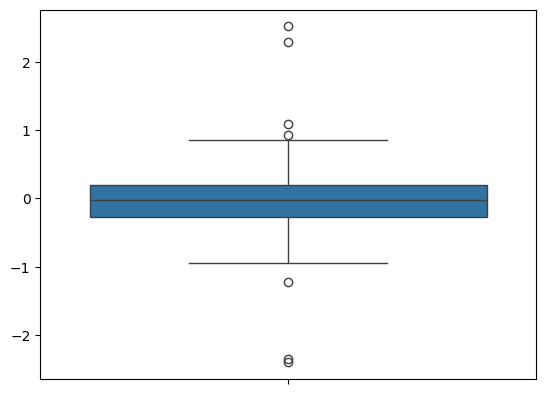

In [38]:
sns.boxplot(model1_weight1_layer1)

<Axes: >

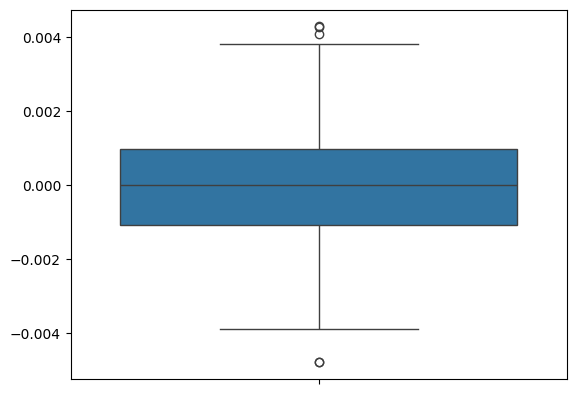

In [39]:
sns.boxplot(model2_weight1_layer1)

In [41]:
model1_weight1_layer1.min()

-2.3988833

In [43]:
model2_weight1_layer1.min()

-0.004801192

<ipython-input-45-fa66d573e11f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight1_layer1)
<ipython-input-45-fa66d573e11f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight1_layer1)


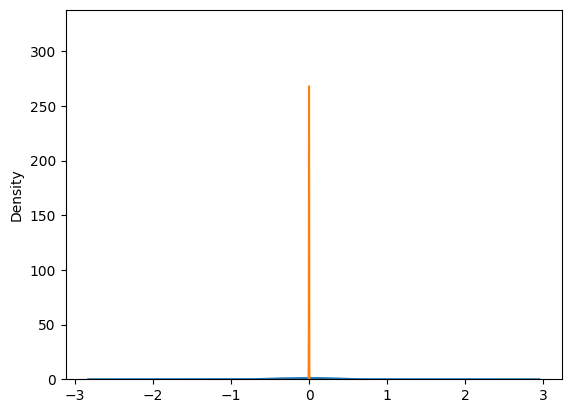

In [45]:
sns.distplot(model1_weight1_layer1)
sns.distplot(model2_weight1_layer1)
plt.show(x)